In [64]:
# importing dependencies
import pytrends
from pytrends.request import TrendReq
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt

In [65]:
# Specify the parameters to your liking
start_date= date(2012, 12, 31) # specify your start date
end_date= date(2019, 3, 7) # specify your end date
key_word = 'Trump' # use one key word
_cat = 0 # Category to narrow down your results
_geo = 'US' # Two letter country abbreviation
_gprop = '' # What Google property to filter to (e.g 'images')
_hl = 'en-US' # Specify Language and Region
_tz = 360 # specify your time-zone

In [66]:
# Source for this function: https://stackoverflow.com/questions/10688006/generate-a-list-of-datetimes-between-an-interval
def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta

In [67]:
# generating a list of dates with 90 day intervals
dates=[]
for res in perdelta(start_date, end_date, timedelta(days=90)):
    dates.append(res)  
dates.append(end_date)

In [68]:
# gettingt the data for the individual time frames and adding them to a list
appended_data = []
for i in range(len(dates)-1):
    _timeframe = str(dates[i]) + ' ' + str(dates[i+1])
    totalTrend = TrendReq(hl=_hl, tz=_tz)
    totalTrend.build_payload([key_word], cat=_cat, timeframe=_timeframe, geo=_geo, gprop=_gprop)
    totalTrend = totalTrend.interest_over_time()
    appended_data.append(totalTrend)
#   print(totalTrend.tail())

In [69]:
# correcting the values of the individual time-frames
for i in range(len(appended_data)-1):
    x = appended_data[i][key_word].tail(1).values
    y = appended_data[i+1][key_word].head(1).values
    if x == 0 and y == 0:
        factor = 1
    elif x == 0:
        factor = 0.5/y
    elif y == 0:
        factor = x/0.5
    else:
        factor = x/y
    appended_data[i+1][key_word] = appended_data[i+1][key_word] * factor

In [70]:
# concatinating all the dfs to one complete dataframe
appended_df = pd.concat(appended_data, axis=0)

In [71]:
# deleting the duplicated indexes/rows
appended_df = appended_df[~appended_df.index.duplicated(keep='first')]

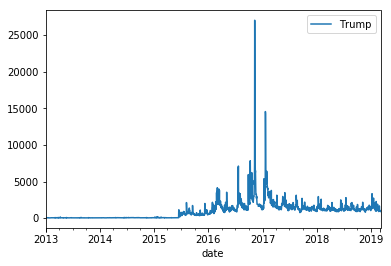

In [72]:
appended_df.plot()
plt.show()

In [73]:
# saving the daily data as a csv
appended_df.to_csv('daily_gtrends.csv')